In [4]:
#!pip install mysql
#!pip install psycopg2
#!pip install plotly

In [1]:
import mysql.connector
import pandas as pd
import psycopg2
from utils import groupby_operation, show_value_counts
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

In [3]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="admin",
  database="teste"
)

mycursor = mydb.cursor()

mycursor.execute("SELECT * FROM clients")

dados = mycursor.fetchall()

clients = pd.DataFrame(dados, columns=['id', 'name', 'email'])
clients

,id,name,email
0,4001,Ariel Swift Jr.,ezequiel.kreiger@example.net
1,4002,Dr. Daisy Waters,lemuel.howe@example.net
2,4003,Beatrice Wisozk,von.alison@example.com
3,4004,Jovani Zboncak V,krajcik.zane@example.org
4,4005,Mr. Jaquan Davis Jr.,janis37@example.org
...,...,...,...
3995,7996,Maxime Buckridge,lukas72@example.net
3996,7997,Casimir Mann,verda.beier@example.net
3997,7998,Braulio Kulas,providenci.raynor@example.com
3998,7999,Willa Kris,annabelle01@example.org


In [4]:
mycursor = mydb.cursor()

mycursor.execute("SELECT * FROM products")

dados = mycursor.fetchall()

produtos = pd.DataFrame(dados, columns=['id', 'product', 'price'])
produtos

,id,product,price
0,201,Konopelski Groves,255.800
1,202,Zemlak Manor,862.340
2,203,Lueilwitz Lane,2905.840
3,204,Will Creek,3093.700
4,205,Mattie Field,3396.850
...,...,...,...
195,396,Armstrong Isle,522.389
196,397,Clarissa Drives,276.300
197,398,Chet Loaf,1573.320
198,399,Esther Glen,1342.950


In [5]:
connection = psycopg2.connect(user="postgres",
                              password="admin",
                              host="127.0.0.1",
                              port="5432",
                              database="teste")
cursor = connection.cursor()
postgreSQL_select_Query = "select si.id, si.sale_id, si.product_id, si.price, \
                           si.quantity, s.client_id, s.created_at, s.updated_at from sale_items si \
                           join sales s \
                           on si.sale_id = s.id;"
cursor.execute(postgreSQL_select_Query)
dados = cursor.fetchall() 
vendas = pd.DataFrame(dados, columns=['sale_item_id', 'sale_id', 'product_id', 'price', 'quantity',
                                      'client_id', 'created_at', 'updated_at'])
vendas

,sale_item_id,sale_id,product_id,price,quantity,client_id,created_at,updated_at
0,000132ac-e203-3cae-aa15-b6a272b870b2,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,2433.800,3.899900,7833,1997-09-17 18:50:14-03:00,2007-02-15 16:34:06-03:00
1,0002702c-95f8-36ff-8dd4-a131478ce45c,77aa9946-a96d-373c-a227-d63bc1afcc90,296,172.680,0.045135,6487,1999-08-19 00:22:44-03:00,2017-07-30 06:27:02-03:00
2,0002ad08-22dc-3521-b951-ffec1f663b29,e0d3160c-0286-3712-a09b-aa9be6e835b0,326,2343.140,4.516790,4357,1987-04-22 02:40:31-03:00,2017-08-21 20:39:39-03:00
3,00088c89-c79e-31a2-a9d2-d60555a39cd6,986f0edf-3cdc-373a-aaa7-e658e105431c,202,786.812,3.000000,4143,2013-12-29 16:47:24-03:00,1982-12-16 23:28:30-03:00
4,00090117-8996-3698-8fa8-4512b86b9add,7302a818-a559-311c-a544-f743a357101a,324,2362.700,0.600000,4507,1996-08-06 03:27:20-03:00,2014-04-28 12:36:13-03:00
...,...,...,...,...,...,...,...,...
44495,fff078a0-c97a-3491-9448-335db4a1e693,b12bfc7e-0340-3099-b123-97b8959b2aa4,323,2159.440,4.000000,5439,1988-02-14 18:24:50-03:00,1990-03-28 21:56:53-03:00
44496,fff6b764-29b0-35e8-bab5-79496561a008,8cf1a469-0c1f-36c7-bf17-c982a60b6eab,332,3372.770,1.000000,5988,2013-02-13 01:33:00-03:00,2007-10-15 15:44:14-03:00
44497,fffe07c5-a79b-3842-a280-c5bb31938301,b71706fe-95f3-38ea-8c92-2d72cbd14240,339,2846.900,1.400000,4567,1973-06-22 21:36:35-03:00,1977-04-02 17:50:09-03:00
44498,fffe56bc-a1c4-35b3-aa8b-4046ce7597a2,203aa51c-a5fa-32e3-80dc-04fd1ce081ed,279,1545.710,0.500000,5947,2003-10-14 19:08:12-03:00,2008-10-03 15:28:06-03:00


In [6]:
tudo = vendas.merge(clients, left_on="client_id", right_on="id")\
    .merge(produtos, left_on="product_id",right_on='id')\
    [['name', 'sale_id', 'product_id', 'product', 'price_y', 'quantity', 'price_x', 'created_at', 
      'updated_at', 'email']]
tudo

,name,sale_id,product_id,product,price_y,quantity,price_x,created_at,updated_at,email
0,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,3.89990,2433.800,1997-09-17 18:50:14-03:00,2007-02-15 16:34:06-03:00,jessica.cole@example.net
1,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,4.00000,1196.580,1997-09-17 18:50:14-03:00,2007-02-15 16:34:06-03:00,jessica.cole@example.net
2,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,1.38452,1975.000,1997-09-17 18:50:14-03:00,2007-02-15 16:34:06-03:00,jessica.cole@example.net
3,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,2.22500,119.526,1997-09-17 18:50:14-03:00,2007-02-15 16:34:06-03:00,jessica.cole@example.net
4,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,2.89000,2386.940,1997-09-17 18:50:14-03:00,2007-02-15 16:34:06-03:00,jessica.cole@example.net
...,...,...,...,...,...,...,...,...,...,...
44495,Ashlynn Jaskolski,3d9d0fd1-0406-3ee8-84ee-5a29be946b2b,235,Roselyn Road,3366.300,3.00000,3455.700,2019-12-09 23:43:34-03:00,1981-04-24 03:20:37-03:00,leffler.mafalda@example.net
44496,Miss Krista Kuhic,c9b46a89-e252-3e69-9b4c-d2a1f7bd86e8,235,Roselyn Road,3366.300,2.45209,1896.100,1981-03-17 10:05:45-03:00,1986-06-24 09:35:27-03:00,leland.vonrueden@example.net
44497,Miss Krista Kuhic,c9b46a89-e252-3e69-9b4c-d2a1f7bd86e8,235,Roselyn Road,3366.300,3.08220,3997.900,1981-03-17 10:05:45-03:00,1986-06-24 09:35:27-03:00,leland.vonrueden@example.net
44498,Miss Krista Kuhic,c9b46a89-e252-3e69-9b4c-d2a1f7bd86e8,235,Roselyn Road,3366.300,1.00000,2695.000,1981-03-17 10:05:45-03:00,1986-06-24 09:35:27-03:00,leland.vonrueden@example.net


In [90]:
tudo.groupby(['product']).quantity.sum().sort_values(ascending=False)[:20]

product
Genesis Mills        622.268287
Cremin Trace         619.207141
Kerluke Curve        617.407935
Alexandrine Glens    600.446712
Irving Run           599.626609
Bethel Plains        599.509195
Schmitt Pines        597.896236
Skiles Loaf          596.101654
Dooley Stravenue     594.660607
German Place         594.116429
Lueilwitz Lane       593.489280
Boyle Gardens        592.854009
Sipes Summit         591.507577
Konopelski Groves    590.060507
Breitenberg Isle     589.992748
Spinka Route         589.196830
Pearline Glen        587.910117
Eulah Prairie        585.456605
Kelton Circle        585.266494
Edwardo Harbor       585.118767
Name: quantity, dtype: float64

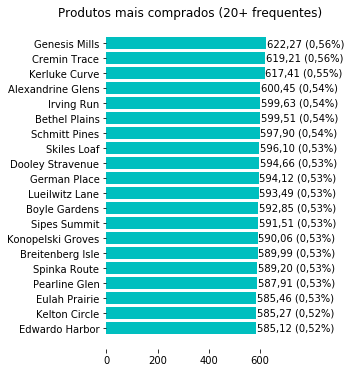

In [47]:
groupby_operation(dataframe=tudo, groupbycolumn='product', operation_column='quantity', 
                  operation='sum', size=20, height=6, width=3,
                  title='Produtos mais comprados (20+ frequentes)')

In [88]:
tudo.groupby(['product']).price_x.sum().sort_values(ascending=False)

product
Toy Stravenue      493558.855100
Schulist Flat      488999.383160
Trycia Shoal       485298.790200
Edwardo Harbor     480334.645400
Rohan Plaza        479509.353700
                       ...      
Hand Mission       408564.102100
Kessler Branch     406723.571100
Octavia Grove      406217.845230
Emard Lakes        400670.893438
Antonia Harbors    396986.638500
Name: price_x, Length: 200, dtype: float64

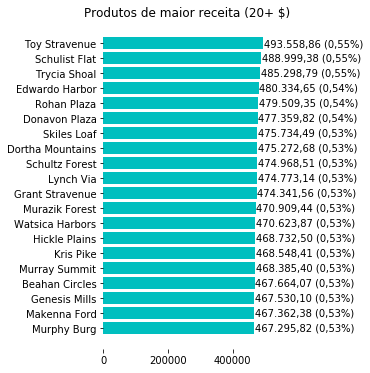

In [48]:
groupby_operation(dataframe=tudo, groupbycolumn='product', operation_column='price_x', 
                  operation='sum', size=20, height=6, width=3,
                  title='Produtos de maior receita (20+ $)')

In [91]:
tudo.groupby(['name']).sale_id.count().sort_values(ascending=False)[:10].sort_values()

name
Mary Hamill               17
Catalina Jenkins          17
Aglae Eichmann            17
Damon Cartwright          18
Dr. Abdullah Kuhic        18
Ernesto Shields           18
Garland Schowalter Jr.    18
Beverly Adams             18
Ambrose Kautzer           24
Elwyn Koepp               26
Name: sale_id, dtype: int64

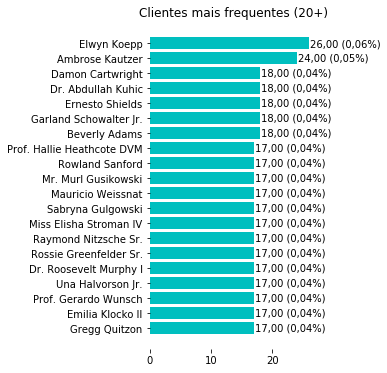

In [9]:
groupby_operation(dataframe=tudo, groupbycolumn='name', operation_column='sale_id', 
                  operation='count', size=20, height=6, width=3,
                  title='Clientes mais frequentes (20+)')

In [94]:
tudo.groupby(['name']).price_x.sum().sort_values(ascending=False)[:10].sort_values()

name
Tanner Blanda                 39824.580
Hailey Reichert               40031.703
Dr. Eldon Koch                40334.487
Roger Harris                  41392.024
Prof. Cecelia Oberbrunner     41561.126
Shirley Stanton               42263.183
Gloria Leannon                43820.187
Mr. Shaun Pouros I            44898.917
Prof. Hallie Heathcote DVM    45249.271
Elwyn Koepp                   51982.721
Name: price_x, dtype: float64

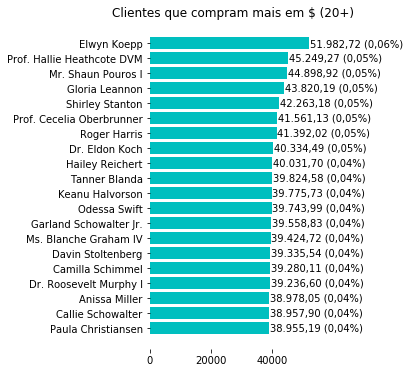

In [10]:
groupby_operation(dataframe=tudo, groupbycolumn='name', operation_column='price_x', 
                  operation='sum', size=20, height=6, width=3,
                  title='Clientes que compram mais em $ (20+)')

In [11]:
tudo['created_at'] = pd.to_datetime(tudo.created_at, utc=True)

In [12]:
tudo['updated_at'] = pd.to_datetime(tudo.updated_at, utc=True)

In [13]:
tudo

,name,sale_id,product_id,product,price_y,quantity,price_x,created_at,updated_at,email
0,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,3.89990,2433.800,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net
1,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,4.00000,1196.580,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net
2,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,1.38452,1975.000,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net
3,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,2.22500,119.526,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net
4,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,2.89000,2386.940,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net
...,...,...,...,...,...,...,...,...,...,...
44495,Ashlynn Jaskolski,3d9d0fd1-0406-3ee8-84ee-5a29be946b2b,235,Roselyn Road,3366.300,3.00000,3455.700,2019-12-10 02:43:34+00:00,1981-04-24 06:20:37+00:00,leffler.mafalda@example.net
44496,Miss Krista Kuhic,c9b46a89-e252-3e69-9b4c-d2a1f7bd86e8,235,Roselyn Road,3366.300,2.45209,1896.100,1981-03-17 13:05:45+00:00,1986-06-24 12:35:27+00:00,leland.vonrueden@example.net
44497,Miss Krista Kuhic,c9b46a89-e252-3e69-9b4c-d2a1f7bd86e8,235,Roselyn Road,3366.300,3.08220,3997.900,1981-03-17 13:05:45+00:00,1986-06-24 12:35:27+00:00,leland.vonrueden@example.net
44498,Miss Krista Kuhic,c9b46a89-e252-3e69-9b4c-d2a1f7bd86e8,235,Roselyn Road,3366.300,1.00000,2695.000,1981-03-17 13:05:45+00:00,1986-06-24 12:35:27+00:00,leland.vonrueden@example.net


In [14]:
tudo.index = tudo.updated_at

In [15]:
vendas_por_mes = tudo.groupby([tudo.index.year,tudo.index.month]).price_x.sum()
vendas_por_mes

updated_at  updated_at
1970        1             277700.10960
            2             144178.31594
            3              98452.80700
            4             126973.45567
            5             154695.11220
                              ...     
2019        10            175098.77550
            11             78501.59020
            12            167333.85800
2020        1             129652.31340
            2              25840.64600
Name: price_x, Length: 602, dtype: float64

In [16]:
vendas_por_mes.index = pd.Series(vendas_por_mes.index.values).apply(lambda x:str(x[0])+'-'+str(x[1]))

In [17]:
vendas_por_mes

1970-1     277700.10960
1970-2     144178.31594
1970-3      98452.80700
1970-4     126973.45567
1970-5     154695.11220
               ...     
2019-10    175098.77550
2019-11     78501.59020
2019-12    167333.85800
2020-1     129652.31340
2020-2      25840.64600
Name: price_x, Length: 602, dtype: float64

In [51]:
layout = dict(title = 'Vendas por mês',
              xaxis = dict(title = 'Mês'),
              yaxis = dict(title = 'Vendas ($)'),
              )
data = [go.Scatter(x=vendas_por_mes.index, y=vendas_por_mes, mode='lines+markers',
                 marker=dict(color='blue'))]
fig = dict(data=data, layout=layout)
iplot(fig)

In [19]:
vendas_por_ano = tudo.groupby([tudo.index.year]).price_x.sum()
vendas_por_ano

updated_at
1970    1.882166e+06
1971    1.754911e+06
1972    1.811622e+06
1973    1.718408e+06
1974    1.754004e+06
1975    1.838448e+06
1976    1.974882e+06
1977    1.857383e+06
1978    1.513375e+06
1979    1.823666e+06
1980    1.782716e+06
1981    1.862540e+06
1982    1.849241e+06
1983    1.824110e+06
1984    1.975986e+06
1985    1.592666e+06
1986    1.684972e+06
1987    1.906334e+06
1988    1.851337e+06
1989    1.851404e+06
1990    1.928646e+06
1991    1.575061e+06
1992    1.985707e+06
1993    1.702805e+06
1994    1.652282e+06
1995    1.696756e+06
1996    1.674399e+06
1997    1.598759e+06
1998    1.862322e+06
1999    1.744987e+06
2000    1.797038e+06
2001    1.764703e+06
2002    1.731385e+06
2003    1.795404e+06
2004    1.461151e+06
2005    1.749673e+06
2006    1.812750e+06
2007    1.790257e+06
2008    1.624042e+06
2009    1.575459e+06
2010    1.764381e+06
2011    1.984656e+06
2012    1.867670e+06
2013    1.691477e+06
2014    1.951036e+06
2015    1.890944e+06
2016    1.638877e+06
20

In [20]:
layout = dict(title = 'Vendas por ano',
              xaxis = dict(title = 'Ano'),
              yaxis = dict(title = 'Vendas ($)'),
              )
data = [go.Scatter(x=vendas_por_ano.index, y=vendas_por_ano, mode='lines+markers',
                 marker=dict(color='blue'))]
fig = dict(data=data, layout=layout)
iplot(fig)

In [22]:
compras_por_hora = tudo.groupby([tudo.index.hour]).sale_id.count()
compras_por_hora

updated_at
0     1829
1     1791
2     1822
3     1941
4     1885
5     1779
6     1793
7     2003
8     1834
9     1968
10    1899
11    1850
12    1827
13    1958
14    1810
15    1930
16    1970
17    1837
18    1700
19    1763
20    1960
21    1908
22    1626
23    1817
Name: sale_id, dtype: int64

In [50]:
layout = dict(title = 'Nº de Compras por hora do dia',
              xaxis = dict(title = 'Hora do dia'),
              yaxis = dict(title = 'Número de Compras'),
              )
data = [go.Scatter(x=compras_por_hora.index, y=compras_por_hora, mode='lines+markers',
                 marker=dict(color='blue'))]
fig = dict(data=data, layout=layout)
iplot(fig)

In [52]:
receita_por_hora = tudo.groupby([tudo.index.hour]).price_x.sum()
layout = dict(title = 'Vendas por hora do dia',
              xaxis = dict(title = 'Hora do dia'),
              yaxis = dict(title = 'Vendas ($)'),
              )
data = [go.Scatter(x=receita_por_hora.index, y=receita_por_hora, mode='lines+markers',
                 marker=dict(color='blue'))]
fig = dict(data=data, layout=layout)
iplot(fig)

In [38]:
dias = {0: 'Segunda', 1: 'Terça', 2: 'Quarta', 3: 'Quinta', 4: 'Sexta', 5: 'Sábado', 6: 'Domingo'}

In [53]:
receita_por_dia = tudo.groupby([tudo.index.weekday]).price_x.sum()
layout = dict(title = 'Vendas por dia da semana',
              xaxis = dict(title = 'Dia da semana'),
              yaxis = dict(title = 'Vendas ($)'),
              )
data = [go.Scatter(x=list(map(lambda x: dias[x], receita_por_dia.index)),
                   y=receita_por_dia, mode='lines+markers',
                 marker=dict(color='blue'))]
fig = dict(data=data, layout=layout)
iplot(fig)

In [54]:
tudo.to_csv('dados/tudo.csv', index=False)